|Santiago Herrero Blanco |  |  | Pràctica 2 |  |  | Tipologia i cicle de vida de les dades|
|------------------------|--|--|------------|--|--|---------------------------------------|


<h1>Dataset:  San Francisco Crime Classification </h1>

https://www.kaggle.com/c/sf-crime 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

data = pd.read_csv('train.csv', sep=",")

<h2>1 – Descripció del dataset. Per què és important i quina pregunta/problema pretén respondre</h2>





El conjunt de dades que he utilitzat conté dades sobre la delinqüència a la ciutat de San Francisco entre els anys 2003 i 2015. Les dades les he descarregat de la plataforma Kaggle, ja que formaven part d'una competició que va finalitzar el juny de 2016. No obstant això, les dades provenien del portal de dades obertes de la ciutat de San Francisco. <br> <br> 
L'anàlisi de la criminalitat en aquesta ciutat és rellevant perquè San Francisco ha estat una de les ciutats amb taxa de delictes més gran dels EUA. La competició consistia en intentar esbrinar la tipologia delictiva a partir d'un moment i un lloc. Aquesta informació podia ser rel
evant per un futur, per predir la delinqüència o per intentar aportar una informació més detallada als agents que s'adrecen a cobrir fets delictius. A més, també es proposava als participants realitzar visualitzacions de les dades. <br><br> 

In [2]:
print "Capçalera del Dataset\n"
print data.head()
print "\n================\n"
print "Descripció dels camps\n"
print data.describe(include='all')
print "\n================\n"

Capçalera del Dataset

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  

Com es pot veure a la capçalera i als descriptors, el dataset té 9 camps i 878.049 registres.<br><br> 
Per una part tenim la informació sobre el <b>moment dels fets</b>, distribuïda en dos camps diferents: 
<ul><li><i>Dates</i> indica els dies i hores dels fets i n'hi ha 389.257 valors únics.</li> 
    <li><i>DayOfWeek</i> com el seu nom indica, recull el dia de la setmana del fet.</li></ul>
Per una altra part, tenim informació sobre el <b>tipus del fet</b>: 
<ul><li><i>Descript</i> recull les 39 categories o grups de delictes en què s'inclou cada fet. </li>
    <li><i>Category</i> identifica a quina de les 879 tipologies de delictes correspon el fet de cada registre. </li></ul> 
Pel que fa als fets, també tenim la informació sobre la <b>resolució</b> d'aquell delicte, amb un sol camp: 
<ul><li><i>Resolution</i> com s'ha comentat mostra si s'ha resolt o com s'ha resolt el fet delictiu, amb 17 valors diferents.</li></ul>  
Per últim, tenim quatre camps relacionats amb el <b>lloc dels fets</b>: 
<ul><li><i>District</i> informa sobre en quin dels 10 districtes de la ciutat han passat els fets. </li>
    <li><i>Address</i> conté la informació sobre l'adreça del lloc, i n'hi ha 23.228 valors únics. </li>
    <li><i>X</i> i <i>Y</i> fan referència a les coordenades geogràfiques. Tot i tractar-se d'atributs diferents han d'analitzar-se de manera conjunta. Són els únics atributs de tipus numèric del dataset.   

<h2>2– Integració i selecció de les dades d’interès a analitzar. </h2>


De l'anàlisi previ, cal destacar que les dades estan en format de text (<i>str</i>), per tant una primera acció que cal realitzar és passar-les a un format de data que es pugui analitzar. A més també s'ha considerat necessari dividir la informació en dos camps, un per al dia i un altre per l'hora, i afegir-ne una categoria per diferenciar entre nit, matí, tarda i vespre. 

In [3]:
data['Days'] = pd.to_datetime(data['Dates'], format='%Y-%m-%d %H:%M:%S', utc=True)

data['FDay'] = data['Days'].dt.date
data['Year'] = data['Days'].dt.year
data['Month'] = data['Days'].dt.month
data['Day'] = data['Days'].dt.day
data['Hour'] = data['Days'].dt.time

data['Session'] = pd.cut(data.Days.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])

print data.head()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y                Days        FDay  Year  Month  Day  \
0 -122.425892  37.774599 2015-05-13 23:53:00  2015-05-13  2015      

De les categories delictives hi ha algunes que no es consideren rellevants, ja sigui per no ser penals, o per tenir una menor rellevància, i s’han descartat del conjunt de dades. 

In [4]:
OutCategories = ["MISSING PERSON", "BAD CHECKS", "FAMILY OFFENSES", "NON-CRIMINAL", "SUICIDE", 
                 "WARRANTS", "TREA", "SECONDARY CODES", "DRUNKENNESS", "GAMBLING"]

ndata = data[~data.Category.isin(OutCategories)]
print len(ndata)

701720


Més enllà d'aquestes dues qüestions, el conjunt de dades no conté variables que no puguin ser explotables, per tant, la selecció és de tot el conjunt de variables. A més es tracta d'un únic arxiu, en conseqüència tampoc no cal realitzar una integració de diversos conjunts de dades. <br><br> 
No obstant això, pel que fa a la integració, per realitzar una anàlisi completa i acurada es podrien cercar conjunts de dades complementaris per integrar amb el de la delinqüència. Per una part, pel que fa a la informació cronològica, podria ser rellevant un calendari dels dies festius i, fins i tot, d'alguns esdeveniments rellevants de la ciutat (fires, congressos, esdeveniments esportius o concerts en què hi hagi grans concentracions de persones). També podria ser interessant, completar la informació geogràfica per districtes (o barris) amb conjunts de dades sobre la densitat de població, la renda per càpita, la distribució del vot o el nivell d'estudis. Per últim, una informació que seria més difícil d'aconseguir però que internament en un anàlisi policial es podria obtenir seria la relacionada amb els efectius, els patrullatges o les operacions policials, distribuïdes al llarg del temps i de la ciutat. <br><br> 
Malauradament no he pogut destinar temps a la recerca d'alguna d'aquestes dades per poder integrar-les al conjunt de dades. 

<h2>3– Neteja de les dades. </h2>

<h3>3.1– Les dades contenen zeros o elements buits? Com gestionaries aquests casos? </h3>

En el conjunt de dades no hi ha elements buits i, tot i que no hi ha zeros, sí que un dels camps de text té valors que podriem considerar com a tals. Es tracta del camp <i>Resolution</i> en el qual el valor més freqüent és <b>None</b>. Malgrat que no hi ha una informació sobre el tancament del cas, el fet que encara resti obert, ja es pot considerar un indicador, per tant, cal mantenir la integritat d'aquest camp i no eliminar els registres que tenen aquest valor. Això no descarta que més endavant es pugui fer alguna anàlisi sense aquest indicador. <br><br> 
Una hipòtesi que em plantejo és que abans de publicar-se les dades, ja sigui a la plataforma Kaggle o al portal de dades obertes de la ciutat de San Francisco, ja s'hagi fet algun tractament d'aquests casos. Considero molt factible que aquells registres sense una informació geogràfica determinada, especialment sense una ubicació amb coordenades X-Y, hagi estat descartada i eliminada del conjunt de dades. També considero possible que en alguns altres casos, si no es tenia aquesta ubicació geogràfica precisa, però si es tenia una adreça, aquesta s'hagi establert a partir d'aquest punt.  

<h3>3.2– Identificació i tractament de valors extrems</h3>

En els descriptors de les dades, entre els valors de la variable "Y" s'observa que el màxim és 90, quan la majoria de les dades són properes al 37. Això indica que clarament hi ha un o més registres amb un valor extrem, pel que fa a la ubicació geogràfica. Entre els valors de la variable "X", la distorsió no és tan gran, però sí que hi ha un o més registres amb el valor -120, quan la majoria dels valors són propers al valor -122. Atès que els objectius estan directament relacionats amb la ubicació geogràfica, els registres d'aquests valors extrems s'han d'ometre i obviar de cara a l'anàlisi.<br> 
Amb una ràpida visualització es pot observar com aquests valors extrems estan molt concentrats, per tant es podrien eliminar els registres que els contenen establint un marge ampli, encara que no es correspongui estrictament amb les coordenades geogràfiques de la ciutat. 


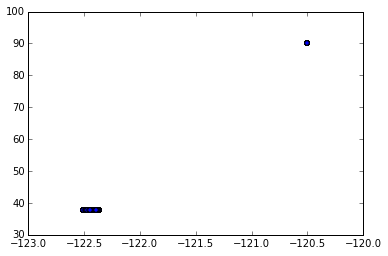

In [5]:
fig, ax = plt.subplots()
ax.scatter(ndata.X, ndata.Y)
plt.show()

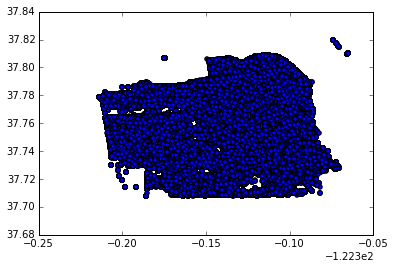

In [6]:
ndata = ndata[(ndata.Y <38)|(ndata.X <-122)] 
fig, ax = plt.subplots()
ax.scatter(ndata.X, ndata.Y)
plt.show()

Entre les variables categòriques, algunes tenen una freqüència molt baixa i, en certa mesura, també es podrien considerar valors extrems. Ara bé, atès que aquests camps, especialment els de <i>Category</i> i <i>Descript</i> són els objectius de la classificació. Més enllà de la primera tria que s'ha fet, descartant alguns valors, en aquest punt també s'ha optat per crear una nova variable <i>Descript2</i> que agrupi dels valors de la variable <i>Descript</i> amb una menor freqüència dins de la seva categoria (he escollit aquelles que representen menys d'un 5%). 

In [7]:
#Calculem les freqüències dels camps Descript i Category
freqsDescr = ndata.groupby(["Descript"])["Descript"].count()
freqsCat = ndata.groupby(["Category"])["Category"].count()

#Les convertim en un DataFrame i les afegim al conjunt de dades
freqsDescr = pd.DataFrame({'Descript':freqsDescr.index, 'DescriptFr':freqsDescr.values})
freqsCat = pd.DataFrame({'Category':freqsCat.index, 'CategoryFr':freqsCat.values})
ndata = pd.merge(ndata, freqsDescr, on="Descript")
ndata = pd.merge(ndata, freqsCat, on="Category")

#Afegim el camp Descript2 que contingui el valor de Descript o una camp d'altres de la seva categoria 
#si la freqüència és inferior al 5% dels elements de la seva categoria 
ndata["Descript2"] = np.where((ndata.DescriptFr>0.05*ndata.CategoryFr),ndata.Descript, ndata.Category+" OTHER") 

print ndata.head()
print "\nComprovem que no s'ha perdut cap altre valor:", len(ndata)
print "\nValors únics del camp Descript: ", len(ndata.groupby(["Descript"])["Descript"].count())
print "\nValors únics del camp Descript2: ",len(ndata.groupby(["Descript2"])["Descript2"].count())


                 Dates        Category                  Descript  DayOfWeek  \
0  2015-05-13 23:53:00  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday   
1  2015-05-13 23:33:00  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday   
2  2015-05-13 19:11:00  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday   
3  2015-05-13 13:41:00  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday   
4  2015-05-13 13:19:00  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday   

   PdDistrict      Resolution                    Address           X  \
0    NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
1    NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2  TENDERLOIN            NONE       400 Block of HYDE ST -122.416236   
3    SOUTHERN  ARREST, BOOKED       HARRISON ST / 2ND ST -122.395163   
4     MISSION  ARREST, BOOKED       17TH ST / MISSION ST -122.419516   

           Y                Days        FDay  Year  Month  Day      Hour  \
0  37.774599 201

<h2>4– Anàlisi de les dades</h2> 

Com hem comentat anteriorment, la variable de l'adreça en aquests moments no ens és útil. De la mateixa manera que ja no ens calen les variables <i>DescriptFr</i> i <i>CategoryFr</i> que mostren, respectivament, les freqüències dels camps <i>Descript</i> i <i>Category</i>. A més, atès que la informació del moment del fet l'hem treballada i disgredada, tampoc no cal ni el camp original <i>Dates</i>, ni el camp <i>Days</i> amb la mateixa informació amb format de temps.             

In [8]:
#Esborrem del dataset les columnes amb les freqüències
ndata = ndata.drop('Address', axis=1)
ndata = ndata.drop('DescriptFr', axis=1)
ndata = ndata.drop('CategoryFr', axis=1)
ndata = ndata.drop('Dates', axis=1)
ndata = ndata.drop('Days', axis=1)

print ndata.head()

         Category                  Descript  DayOfWeek  PdDistrict  \
0  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
1  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
2  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday  TENDERLOIN   
3  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday    SOUTHERN   
4  OTHER OFFENSES  TRAFFIC VIOLATION ARREST  Wednesday     MISSION   

       Resolution           X          Y        FDay  Year  Month  Day  \
0  ARREST, BOOKED -122.425892  37.774599  2015-05-13  2015      5   13   
1  ARREST, BOOKED -122.424363  37.800414  2015-05-13  2015      5   13   
2            NONE -122.416236  37.784913  2015-05-13  2015      5   13   
3  ARREST, BOOKED -122.395163  37.784310  2015-05-13  2015      5   13   
4  ARREST, BOOKED -122.419516  37.763429  2015-05-13  2015      5   13   

       Hour    Session             Descript2  
0  23:53:00    Evening  OTHER OFFENSES OTHER  
1  23:33:00    Evening  OTHER OFFENSES O

Les possibiltats de comparació i de creuament de dades són moltes però entre d'altres es podrien analitzar: 
- Dies i franges horàries amb major nombre de fets
- Similituds o diferències en els districtes en funció de dia i la franja horària
- Similituds o diferències en les categories de fets de fets en funció de la franja horària 
- Fets o categories de fets amb més resolucions 
- Districtes on es resolen més delictes 
- Estacionalitat dels delictes al llarg dels anys 

In [9]:
crimes_DayWeek_Session = ndata.groupby(["DayOfWeek", "Session"])["Session"].count()
#crimes_DayWeek_Session.sort(axis=1, ascending=False)
print crimes_DayWeek_Session
print  "\n------\n"

DayOfWeek  Session  
Friday     Afternoon    35896
           Evening      30412
           Morning      25039
           Night        10223
Monday     Afternoon    33071
           Evening      24541
           Morning      24822
           Night         9634
Saturday   Afternoon    31214
           Evening      29401
           Morning      20551
           Night        13823
Sunday     Afternoon    29182
           Evening      23543
           Morning      19116
           Night        14645
Thursday   Afternoon    33799
           Evening      27024
           Morning      24793
           Night         9660
Tuesday    Afternoon    34194
           Evening      25874
           Morning      25832
           Night         9447
Wednesday  Afternoon    36488
           Evening      26467
           Morning      26479
           Night         9470
Name: Session, dtype: int64

------



In [10]:
District_DoW_Sess = pd.crosstab(ndata.PdDistrict, [ndata.DayOfWeek, ndata.Session])
print District_DoW_Sess

DayOfWeek     Friday                          Monday                        \
Session    Afternoon Evening Morning Night Afternoon Evening Morning Night   
PdDistrict                                                                   
BAYVIEW         3734    3068    2797   876      3481    2540    2825   856   
CENTRAL         3734    3045    2366  1190      3086    2138    2287  1022   
INGLESIDE       3156    2748    2415   879      2998    2526    2423   882   
MISSION         4381    4245    3299  1656      4297    3451    3063  1503   
NORTHERN        4216    4214    2976  1478      3865    3143    2746  1379   
PARK            2053    1545    1458   533      1768    1395    1469   440   
RICHMOND        1882    1391    1422   478      1704    1334    1336   428   
SOUTHERN        6648    5757    4221  1619      5976    3904    4331  1440   
TARAVAL         2739    2144    2157   679      2407    1932    1953   649   
TENDERLOIN      3353    2255    1928   835      3489    2178    

In [11]:
Categories_Sess = pd.crosstab(ndata.Category, ndata.Session)
print Categories_Sess  

Session                      Afternoon  Evening  Morning  Night
Category                                                       
ARSON                              300      409      219    484
ASSAULT                          23665    19288    17739  11892
BRIBERY                             98       79       61     35
BURGLARY                         11863     8118    10548   4860
DISORDERLY CONDUCT                 894      700     1355   1134
DRIVING UNDER THE INFLUENCE        273      812       98    786
DRUG/NARCOTIC                    22998    12678    13011   3581
EMBEZZLEMENT                       294      100      515     17
EXTORTION                           72       39       91     23
FORGERY/COUNTERFEITING            3669     1085     3937    306
FRAUD                             5341     2569     5549    923
KIDNAPPING                         673      598      487    437
LARCENY/THEFT                    64580    51908    38297  13081
LIQUOR LAWS                        765  

In [12]:
Categories_Res = pd.crosstab(ndata.Category, ndata.Resolution)
print Categories_Res

Resolution                   ARREST, BOOKED  ARREST, CITED  \
Category                                                     
ARSON                                   203              7   
ASSAULT                               23446           3547   
BRIBERY                                 159              2   
BURGLARY                               4867             83   
DISORDERLY CONDUCT                     1505           1337   
DRIVING UNDER THE INFLUENCE            1939            185   
DRUG/NARCOTIC                         43749           4497   
EMBEZZLEMENT                            163             23   
EXTORTION                                43              4   
FORGERY/COUNTERFEITING                 1940            119   
FRAUD                                  1907            461   
KIDNAPPING                             1014              9   
LARCENY/THEFT                          9913           5236   
LIQUOR LAWS                             904            713   
LOITERIN

In [13]:
Districts_Res = pd.crosstab(ndata.PdDistrict, ndata.Resolution)
print Districts_Res

Resolution  ARREST, BOOKED  ARREST, CITED  \
PdDistrict                                  
BAYVIEW              14551           9614   
CENTRAL              10405           5797   
INGLESIDE            10362           6654   
MISSION              26174          13302   
NORTHERN             15955           7163   
PARK                  7227           2933   
RICHMOND              4752           2543   
SOUTHERN             28379          13624   
TARAVAL               7135           4354   
TENDERLOIN           32336           8445   

Resolution  CLEARED-CONTACT JUVENILE FOR MORE INFO  \
PdDistrict                                           
BAYVIEW                                         28   
CENTRAL                                          6   
INGLESIDE                                       17   
MISSION                                         15   
NORTHERN                                        14   
PARK                                             7   
RICHMOND                   

In [14]:
yearlyEvolution = pd.crosstab(ndata.Month,ndata.Year)
print yearlyEvolution

Year   2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Month                                                                           
1      4708  4823  4644  4736  4125  4189  4387  4245  4835  4694  4383  4451   
2      4846  4593  4241  4471  4056  4277  4317  4071  3965  4263  4429  4380   
3      4946  5772  4417  4368  4136  4822  5500  4039  4054  4122  4422  4794   
4      5494  5614  4491  4518  4249  5012  5303  3977  3942  4391  5045  4998   
5      5657  5615  5160  4992  4980  5464  5152  4523  4411  5145  5166  5196   
6      4907  4547  5022  5178  4823  4671  3746  4717  4559  4695  5070  4583   
7      4420  4635  5292  5086  4828  4666  4075  4901  4536  4493  4583  4484   
8      4625  5255  4422  4558  4382  4406  5102  4568  3956  4256  4708  4818   
9      5446  5154  4394  4278  4556  5267  5439  4241  4099  4435  5147  5179   
10     5894  5404  5106  5003  5488  5972  5325  4198  4123  5875  5820  5770   
11     5012  4076  5244  474

In [15]:
print crimes_DayWeek_Session.describe()
print District_DoW_Sess.describe()
print Categories_Sess.describe()
print Categories_Res.describe()
print Districts_Res.describe()
print yearlyEvolution.describe()

count       28.000000
mean     23737.142857
std       8627.327532
min       9447.000000
25%      17998.250000
50%      25435.500000
75%      29653.750000
max      36488.000000
Name: Session, dtype: float64
            Friday                                              Monday  \
         Afternoon      Evening      Morning        Night    Afternoon   
count    10.000000    10.000000    10.000000    10.000000    10.000000   
mean   3589.600000  3041.200000  2503.900000  1022.300000  3307.100000   
std    1360.504416  1361.033741   858.470015   437.666045  1263.631315   
min    1882.000000  1391.000000  1422.000000   478.000000  1704.000000   
25%    2843.250000  2171.750000  1985.250000   718.000000  2554.750000   
50%    3543.500000  2896.500000  2390.500000   877.500000  3283.500000   
75%    4095.500000  3927.500000  2931.250000  1406.000000  3771.000000   
max    6648.000000  5757.000000  4221.000000  1656.000000  5976.000000   

                                                 Satu

<h2>5 – Representació dels resultats a partir de taules i gràfiques </h2>

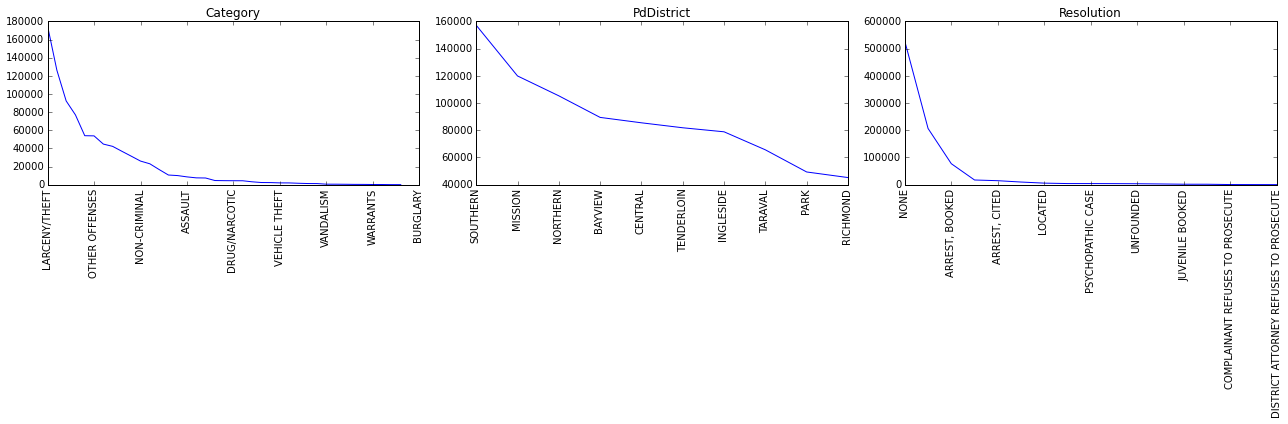

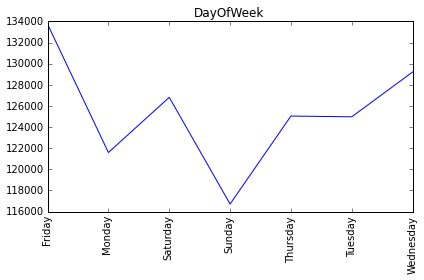

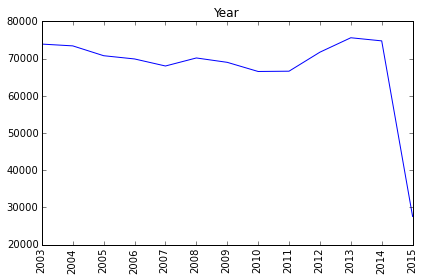

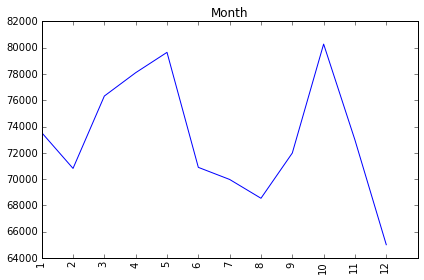

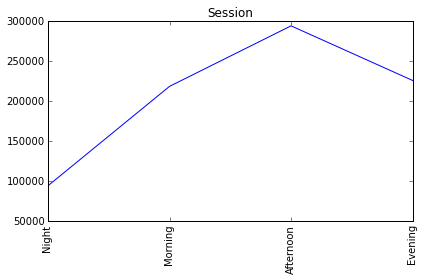

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, axis in zip(["Category", "PdDistrict", "Resolution"], ax.reshape(-1)):
    currPlotData = data.groupby([i])[i].count()
    currPlotData.sort(ascending=False)
    axis.plot(currPlotData.values)
    axis.set_xticklabels(currPlotData.index, rotation='vertical')
    axis.set_title(i)
    plt.tight_layout()
                  
                            
for i in ["DayOfWeek", "Year", "Month", "Session"]:
    
    fig, ax = plt.subplots()
    currPlotData = data.groupby([i])[i].count()
    ax.plot(currPlotData.values)
    plt.xticks(range(len(currPlotData.index)), currPlotData.index, rotation='vertical')
    plt.title(i)
    plt.tick_params(labeltop='off', labelright='off')
    plt.tight_layout()



/Users/Santi/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[]

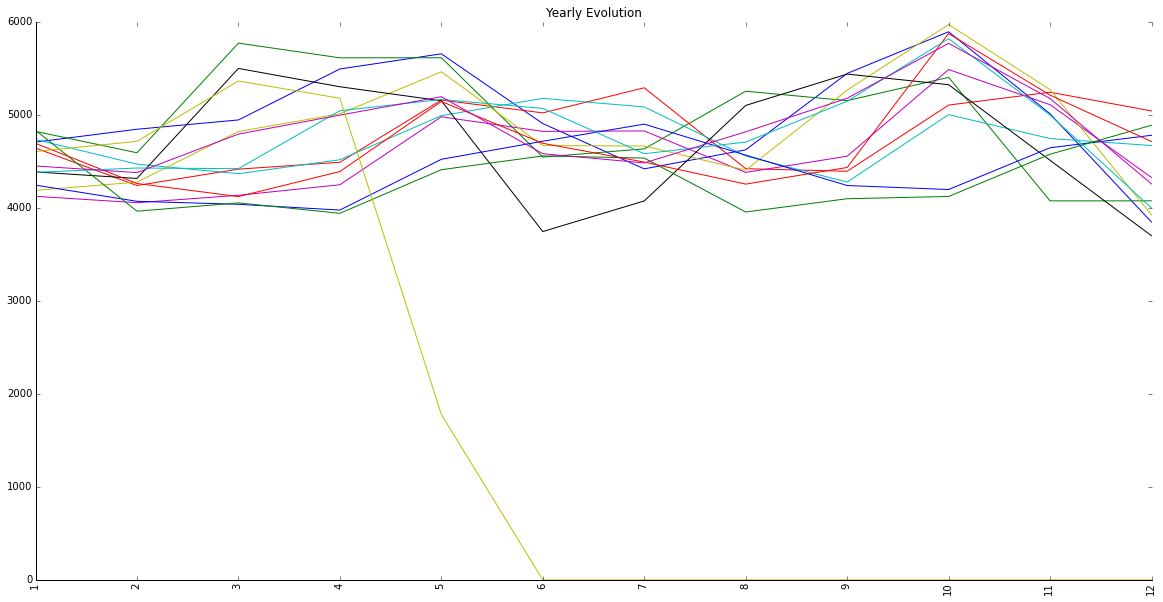

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
for year in yearlyEvolution.columns: 
    ax.plot(yearlyEvolution[year])
plt.xticks(range(len(yearlyEvolution.index)), yearlyEvolution.index, rotation='vertical')
plt.title("Yearly Evolution")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend(loc='best', shadow=False)
plt.plot()

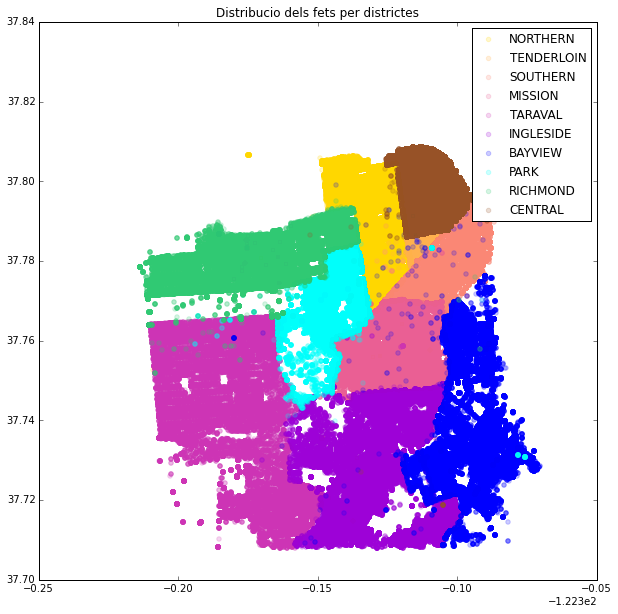

In [18]:
plt.figure(figsize = (10, 10))
colors = ["#ffd700", "#ffb14e","#fa8775", "#ea5f94", "#cd34b5", "#9d02d7", "#0000ff", "#00fffb", "#30c973", "#975227"]

for color, i in zip(colors, ndata.PdDistrict.unique()):
    plt.scatter(ndata[ndata['PdDistrict'] == i].X, ndata[ndata['PdDistrict'] == i].Y, color=color, alpha=.2, 
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Distribucio dels fets per districtes')
plt.show()

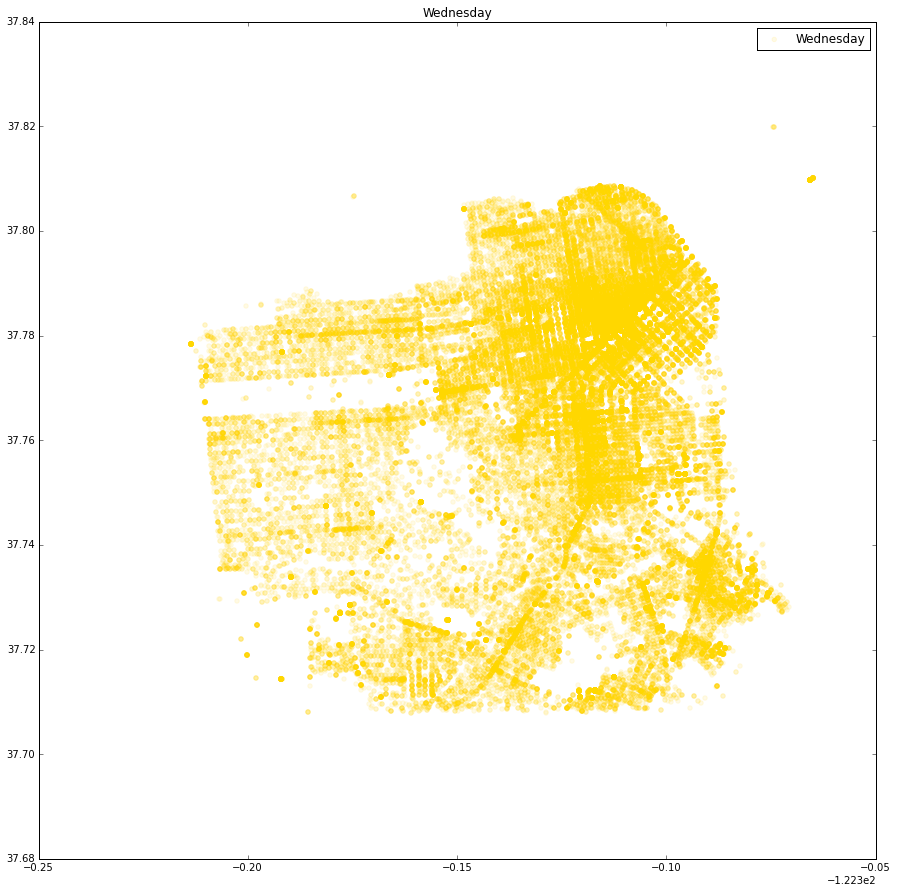

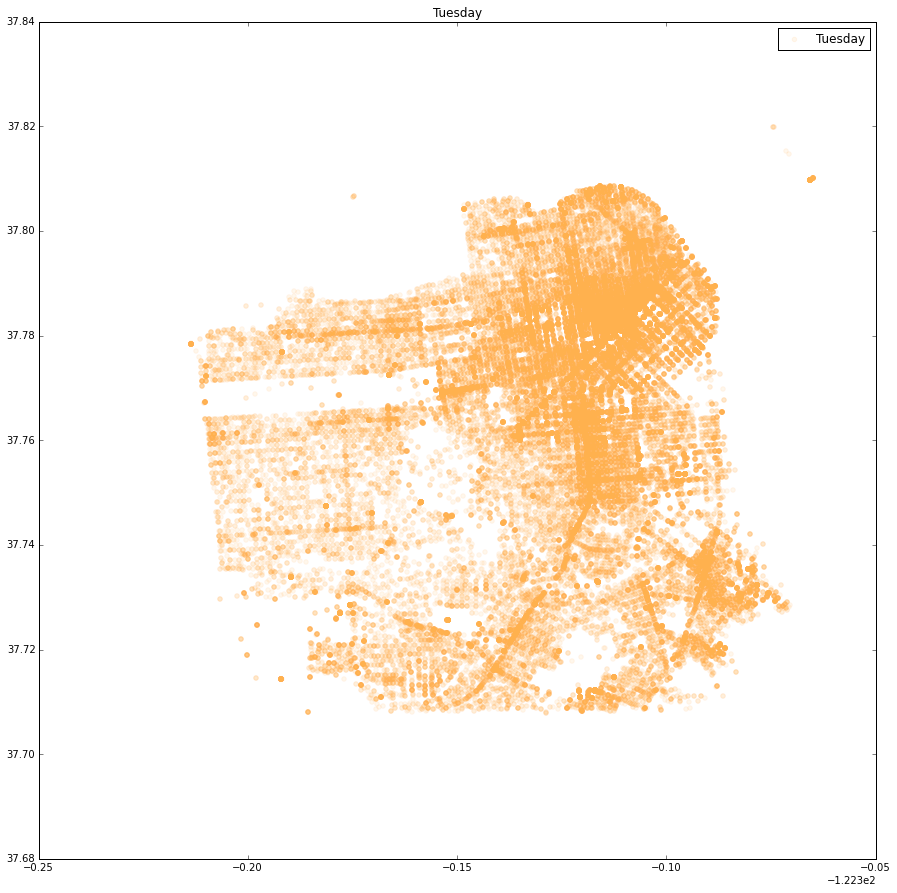

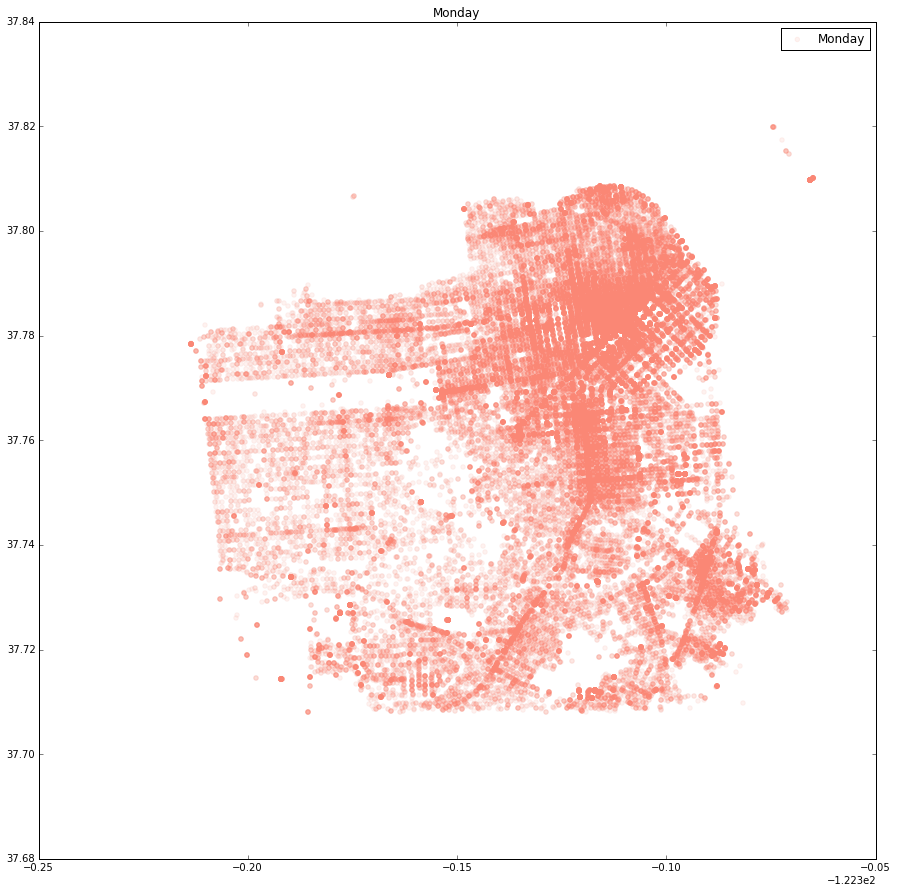

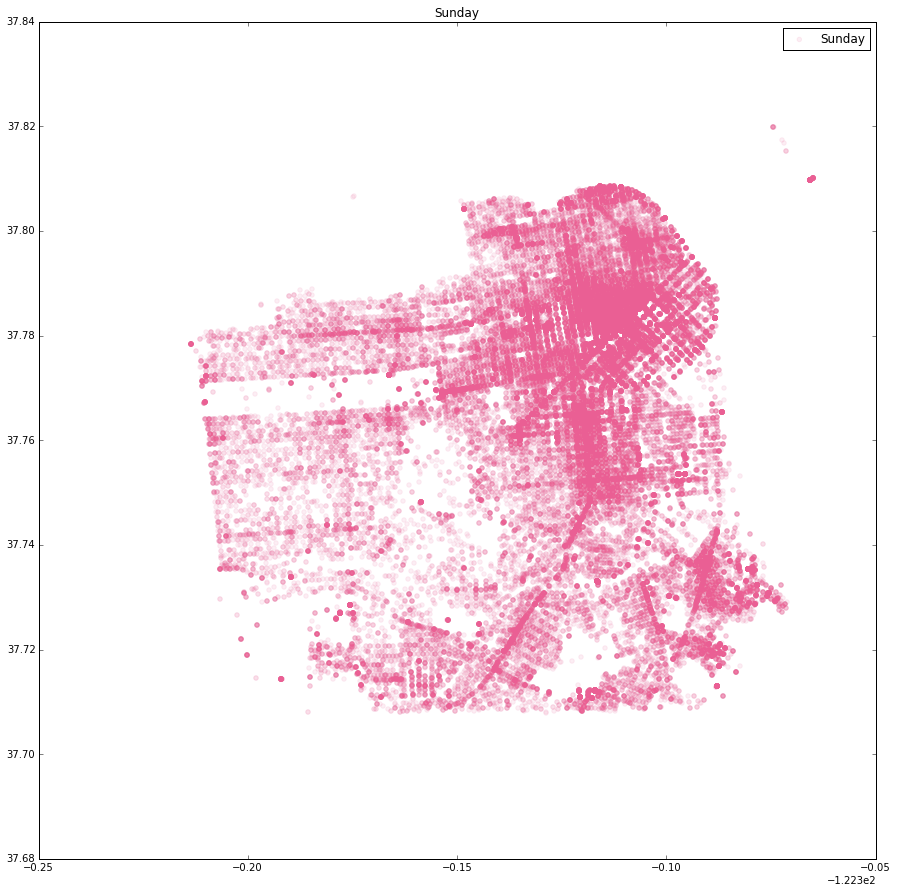

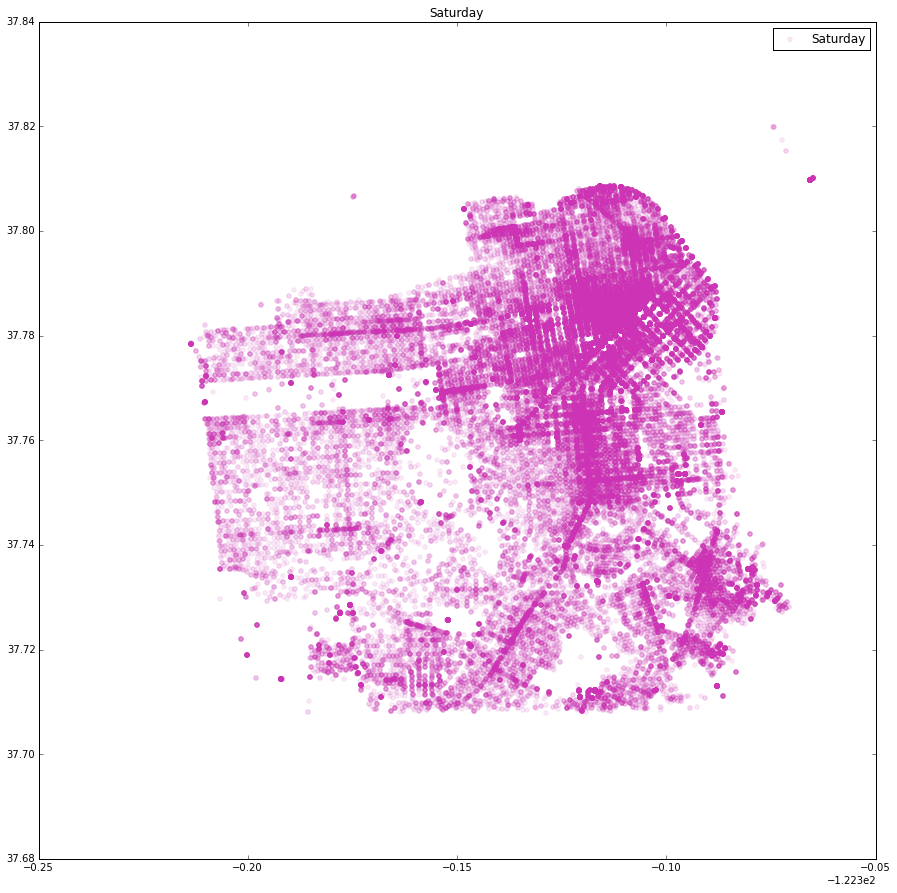

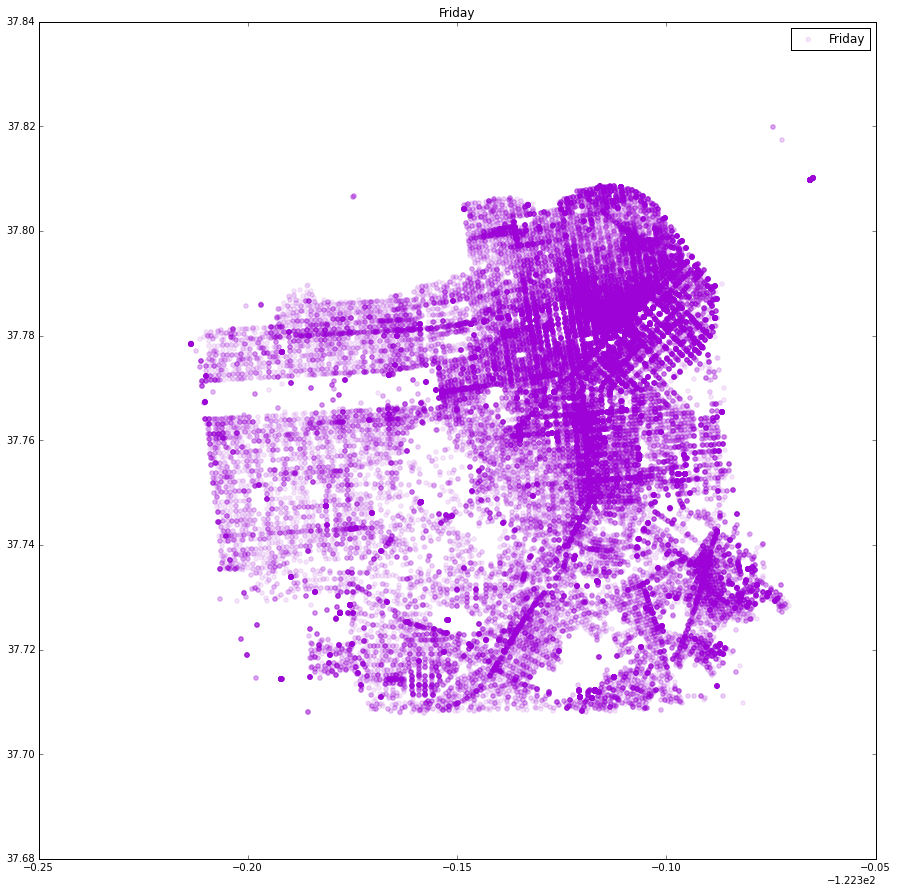

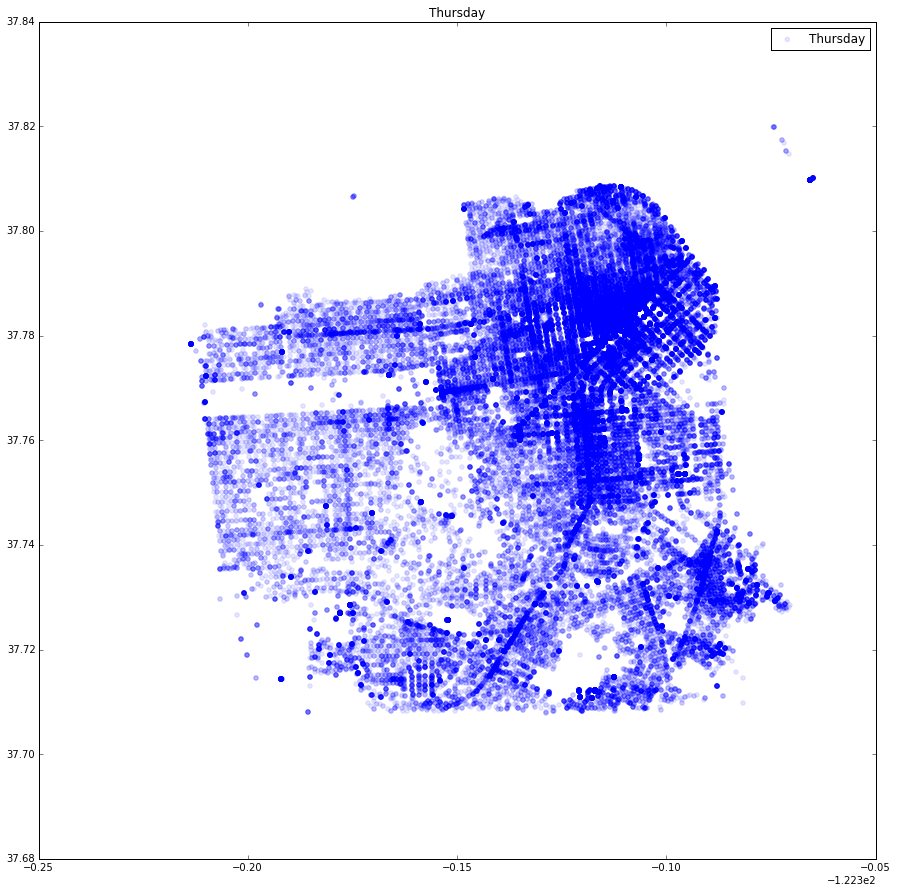

In [19]:
colors = ["#ffd700", "#ffb14e","#fa8775", "#ea5f94", "#cd34b5", "#9d02d7", "#0000ff", "#00fffb", "#30c973", "#975227"]

for color, i in zip(colors[:7], ndata.DayOfWeek.unique()):
    plt.figure(figsize = (15, 15))
    plt.scatter(ndata[ndata['DayOfWeek'] == i].X, ndata[ndata['DayOfWeek'] == i].Y, color=color, alpha=.1, 
                label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(i)
    plt.show()


<h2>7– Codi: </h2>

El codi està disponible a:  

https://github.com/hitnas/hitnas-TCVD_Prac2_Neteja_validacio